In [1]:
pip install tensorflow keras matplotlib numpy opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import Required Libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_dir = r"C:\Users\TUSHAR CHOUDHARY\Downloads\training"
validation_dir = r"C:\Users\TUSHAR CHOUDHARY\Downloads\validation"
test_dir = r"C:\Users\TUSHAR CHOUDHARY\Downloads\evaluation"

In [4]:
# Image Data Preprocessing and Augmentation
# Image augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [5]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')  # 11 classes in the Food-11 dataset
])

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.1951 - loss: 2.2622 - val_accuracy: 0.3020 - val_loss: 2.0107
Epoch 2/30
  1/308 ━━━━━━━━━━━━━━━━━━━━ 2:26 478ms/step - accuracy: 0.1875 - loss: 2.0500

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


308/308 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.1875 - loss: 2.0500 - val_accuracy: 0.3058 - val_loss: 2.0051
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.2844 - loss: 2.0409 - val_accuracy: 0.3411 - val_loss: 1.9273
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.4062 - loss: 1.8374 - val_accuracy: 0.3464 - val_loss: 1.9174
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.3226 - loss: 1.9284 - val_accuracy: 0.3785 - val_loss: 1.7909
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 42s 137ms/step - accuracy: 0.3438 - loss: 1.9004 - val_accuracy: 0.3750 - val_loss: 1.8009
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.3665 - loss: 1.8347 - val_accuracy: 0.3700 - val_loss: 1.8484
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 230s 748ms/step - accuracy: 0.4688 - loss: 1.7042 - val_accuracy: 0.3721 - val_loss: 1.8464
Epoch 9/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.3805 - loss: 1.7896 - val_accura

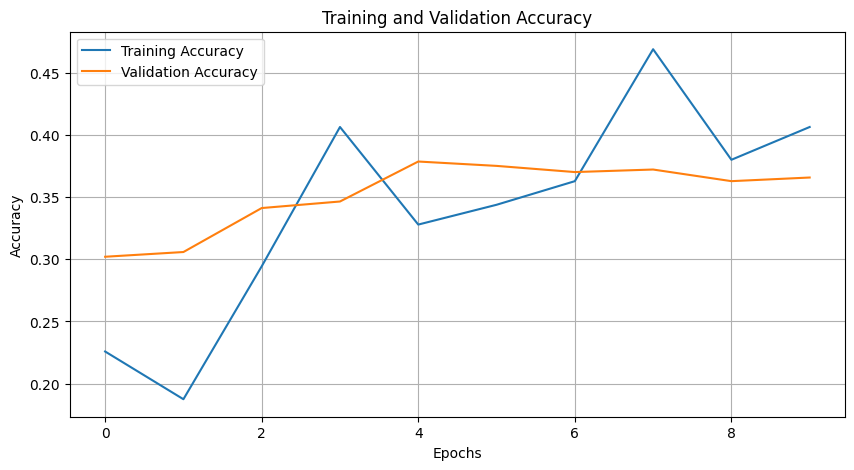

In [8]:
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

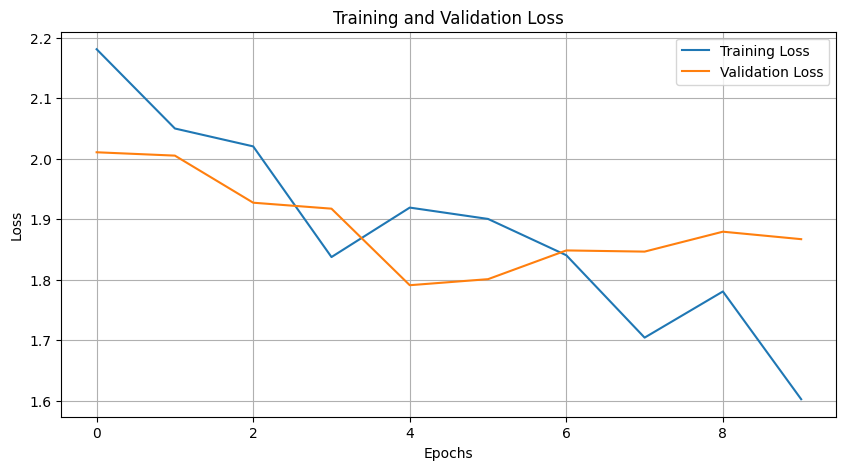

In [9]:
# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [10]:
# Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 751ms/step - accuracy: 0.3933 - loss: 1.8190

Test Accuracy: 38.64%
Test Loss: 1.8459


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


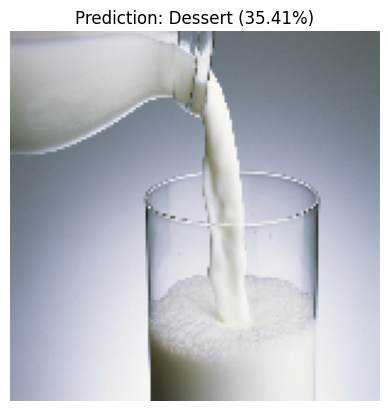

Predicted Class: Dessert
Prediction Probability: 35.41%


In [15]:
def predict_food(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    img_array /= 255.0  # Rescale

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])  # Get the index of the class with highest probability
    class_labels = list(train_generator.class_indices.keys())  # Map index to class label
    predicted_class = class_labels[class_idx]
    predicted_prob = predictions[0][class_idx] * 100
    
    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class} ({predicted_prob:.2f}%)")
    plt.show()

    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Probability: {predicted_prob:.2f}%")

# Test with an image of your choice (provide a path to a sample image in your 'evaluation' folder)
predict_food(r"C:\Users\TUSHAR CHOUDHARY\Downloads\evaluation\Dairy product\59.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


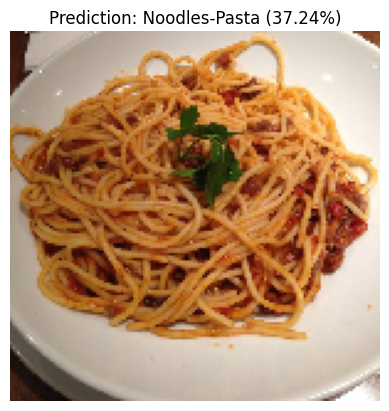

Predicted Class: Noodles-Pasta
Prediction Probability: 37.24%


In [16]:
predict_food(r"C:\Users\TUSHAR CHOUDHARY\Downloads\evaluation\Noodles-Pasta\56.jpg")

In [ ]:
predict_food(r)